# Classifying Heart Disease


### Data Source
https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

url = 'https://raw.githubusercontent.com/ospeltz/BIOL419proj/master/heart.csv?\
token=Atx-bzOd4AGFqLjMVz169QIVrSA1IXG5ks5ce2RYwA%3D%3D'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualization of Data

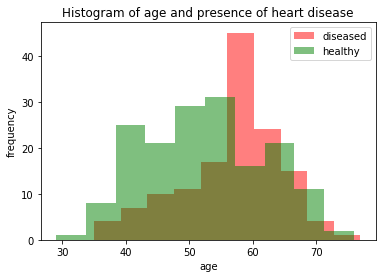

In [11]:
def hist_heart_disease(col,units=''):
    diseased = df[df['target']==0][col].values
    healthy = df[df['target']==1][col].values
    plt.hist(diseased,color='red',alpha=0.5,label='diseased')
    plt.hist(healthy,color='green',alpha=0.5,label='healthy')
    plt.legend()
    plt.xlabel(col + units)
    plt.ylabel('frequency')
    plt.title('Histogram of {} and presence of heart disease'.format(col))
  
  
hist_heart_disease('age')

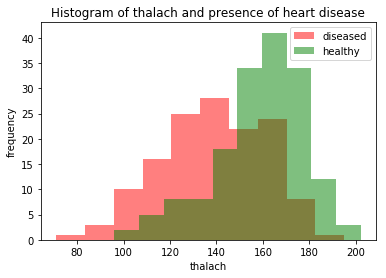

In [13]:
hist_heart_disease('thalach')

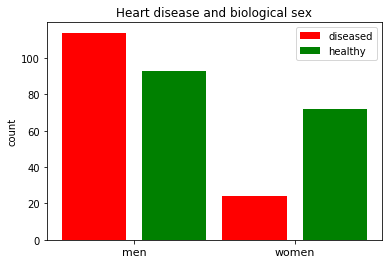

In [14]:
men = df[df['sex']==1]
women = df[df['sex']==0]
men_d = men[men['target']==0]
men_h = men[men['target']==1]
women_d = women[women['target']==0]
women_h = women[women['target']==1]
bars = plt.bar(np.arange(4),[len(men_d),len(men_h),len(women_d),len(women_h)],
        color=['r','g','r','g'])
plt.xticks([0.5,2.5],['men','women'],fontsize=11)
bars[0].set_label('diseased')
bars[1].set_label('healthy')
plt.legend()
plt.ylabel('count')
plt.title('Heart disease and biological sex')
plt.show()

## Cleaning up data
Use OneHot encoding turn categorical variables into a collection of binary variables.

In [6]:
from sklearn.preprocessing import OneHotEncoder

def onehot_df(df):
    # create a new df with no categorical variables, instead each categorical column
    # is turned into multiple binary columns, one for each discrete value in a 
    # categorical column
    enc = OneHotEncoder(sparse=False,categories='auto')
    # these are the categorical columns in the whole dataset
    categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
    # later we take out some variables and use this function on a reduced df
    cat_cols = [col for col in categorical_cols if col in df.columns]
    clean_df = df.drop(cat_cols,axis=1)
    onehot = enc.fit_transform(df[cat_cols])
    new_cols = enc.get_feature_names(cat_cols)
    for i in range(len(new_cols)):
        clean_df[new_cols[i]] = onehot[:,i]

    return clean_df

clean_df = onehot_df(df)
X = clean_df.drop('target', axis=1).values
y = clean_df['target'].values

In [7]:
clean_df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,130,250,187,3.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,130,204,172,1.4,1,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,120,236,178,0.8,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57,120,354,163,0.6,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Returns shuffled arrays of test indices and training indices
def test_train_ids(N,frac):
    inds = np.arange(N)
    np.random.shuffle(inds)
    n = int(frac*N)
    return inds[:n], inds[n:]

In [9]:
from datetime import datetime

def cross_val_class_accuracy(model, X, y, test_Frac, reps, name=False, verbose=True):
    if verbose:
        if not name:
            name = type(model).__name__
        print("Cross validating model:", name)
    accuracy = 0
    start_time = datetime.now()
    for i in range(reps):
        # Generate random indices for training and testing data sets
        [testing_indices, training_indices] = test_train_ids(X.shape[0], test_Frac)
        
        # Extract sets from data
        training_data = X[training_indices, :]
        testing_data = X[testing_indices, :]
        training_labels = y[training_indices]
        testing_labels = y[testing_indices]
        
        # Normalize data
        training_mean = training_data.mean(axis=0)
        training_data = training_data - training_mean
        testing_data = testing_data - training_mean

        # Train model using training data and corresponding labels
        model.fit(training_data, training_labels)

        # Predict testing data and compare to actual data
        prediction = model.predict(testing_data)
        accuracy += sum(prediction == testing_labels) / len(testing_labels)
    cv_acc = accuracy / reps
    timediff = datetime.now() - start_time
    if verbose:
        print("Done! (", timediff.total_seconds(), "seconds )")
        print("Accuracy:", cv_acc * 100, "%")
        print("----------------------------------")
    return cv_acc

## Cross validation accuracy of different models

Our data will be separated 80-20 for model selection and final testing. We will do cross validation on the 80%, further splitting it up for testing and training and use it to select the best model, then we will test our best models on the final unused 20%.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

# Generate models
models = [KNeighborsClassifier(n_neighbors=2), 
          KNeighborsClassifier(n_neighbors=10), 
          LDA(), SVC(kernel='linear'), 
          tree.DecisionTreeClassifier(),
         LogR()]
model_names = ["KNN (N = 2)", "KNN (N = 10)", "LDA", "SVC (Linear)", "Decision Tree", "Logistic Regression"]

# Extract training/cv data
[testX, trainX] = test_train_ids(len(X), 0.2)
test_data = X[testX, :]
test_labels = y[testX]
train_data = X[trainX, :]
train_labels = y[trainX]

# Calculate accuracies for each model using 20% for cross validation
initial_result = []
for x in range(len(models)):
    model = models[x]
    value = cross_val_class_accuracy(model, train_data, train_labels, 0.2, 200)
    initial_result.append(value)
print("Finished testing all models!")

Cross validating model: KNeighborsClassifier
Done! ( 0.173563 seconds )
Accuracy: 57.89583333333339 %
----------------------------------
Cross validating model: KNeighborsClassifier
Done! ( 0.191463 seconds )
Accuracy: 67.10416666666669 %
----------------------------------
Cross validating model: LinearDiscriminantAnalysis
Done! ( 0.27626 seconds )
Accuracy: 84.14583333333336 %
----------------------------------
Cross validating model: SVC
Done! ( 43.475687 seconds )
Accuracy: 83.89583333333329 %
----------------------------------
Cross validating model: DecisionTreeClassifier
Done! ( 0.143616 seconds )
Accuracy: 74.43749999999997 %
----------------------------------
Cross validating model: LogisticRegression
Done! ( 0.248335 seconds )
Accuracy: 84.56250000000003 %
----------------------------------
Finished testing all models!


[0.5789583333333339, 0.6710416666666669, 0.8414583333333335, 0.8389583333333328, 0.7443749999999997, 0.8456250000000003]


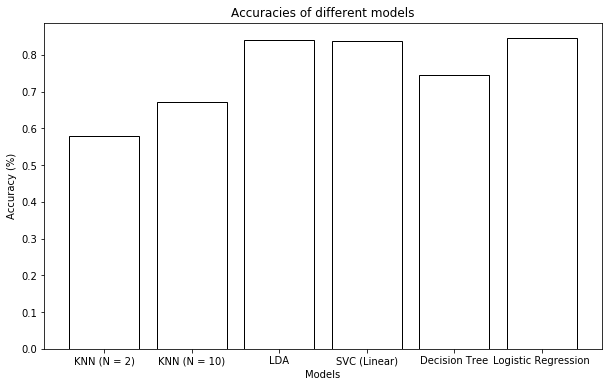

In [49]:
plt.figure(figsize=(10,6))
plt.bar(model_names, initial_result, facecolor='none', edgecolor='black')
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracies of different models");
print(initial_result)

LDA, SVC, and Logistic Regression models have the highest accuracy on the cross validation set, we will focus on these 3 for the rest.

# Testing different hyperparameters

## Support Vector Machine

In [12]:
svm_models = [SVC(kernel='rbf'), SVC(kernel='linear'),
          SVC(kernel='poly', degree=2), SVC(kernel='poly', degree=3),
         SVC(kernel='sigmoid')]
svm_names = ['Radial basis function', 'Linear', 'Polynomial $n=2$',
        'Polynomial $n=3$', 'Sigmoid']

svm_accuracies = []
for model, name in zip(svm_models, svm_names):
    acc = cross_val_class_accuracy(model, train_data, train_labels, 0.2, 200, name)
    svm_accuracies.append(acc)

Cross validating model: Radial basis function
Done! ( 0.508639 seconds )
Accuracy: 57.208333333333336 %
----------------------------------
Cross validating model: Linear
Done! ( 42.752621 seconds )
Accuracy: 83.80208333333334 %
----------------------------------
Cross validating model: Polynomial $n=2$
Done! ( 845.690568 seconds )
Accuracy: 61.55208333333332 %
----------------------------------
Cross validating model: Polynomial $n=3$
Done! ( 103.110139 seconds )
Accuracy: 72.25000000000004 %
----------------------------------
Cross validating model: Sigmoid
Done! ( 0.342085 seconds )
Accuracy: 55.395833333333336 %
----------------------------------


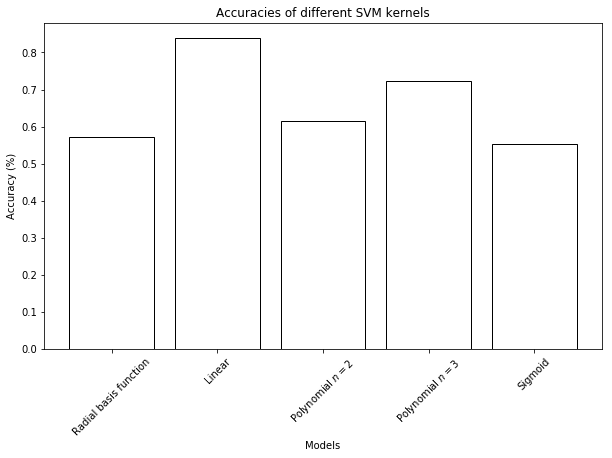

In [13]:
plt.figure(figsize=(10,6))
plt.bar(svm_names, svm_accuracies, facecolor='none', edgecolor='black')
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.title("Accuracies of different SVM kernels");

Linear kernels for SVC has highest accuracy, however all the SVM models take a long time to train.

In [56]:
def try_penalties(penalties, model_func, reps, X, y):
    # penalties is an array of penalties to be tried, model_func is a function handle that takes
    # one argument and returns an initialized model with the argument as a penalty
    start_time = datetime.now()
    accuracies = np.zeros((reps, len(penalties)))
    for rep in range(reps):
        [testX, trainX] = test_train_ids(len(X), 0.2)
        test_data = X[testX, :]
        test_labels = y[testX]
        train_data = X[trainX, :]
        train_labels = y[trainX]
        
        # Normalize data
        training_mean = train_data.mean(axis=0)
        train_data = train_data - training_mean
        test_data = test_data - training_mean
        
        for i, p in enumerate(penalties):
            # Changed this bc we want to use same test/train set for every rep
            # I.e. isolate only the penalty as the independent variable
            model = model_func(p)
            model.fit(train_data, train_labels)
            accuracies[rep, i] = model.score(test_data, test_labels)
            
    time = (datetime.now() - start_time).total_seconds()
    print('Time elapsed:', time)
    if time > 1000:
        print('ouch')
    return np.mean(accuracies, axis=0)

In [57]:
svc_func = lambda p : SVC(kernel='linear', C=p)
penalties = [0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
svm_penalty_accs = try_penalties(penalties, svc_func, 50, train_data, train_labels) # use less reps for SVC so we don't die of old age

Time elapsed: 240.064734


Best penalty for this model: C =  1.28


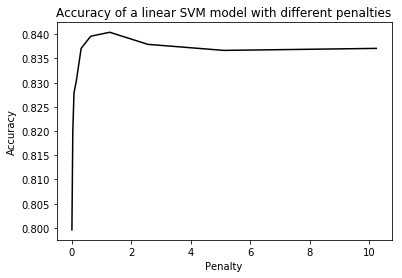

In [58]:
plt.plot(penalties, svm_penalty_accs, color='black')
plt.title('Accuracy of a linear SVM model with different penalties')
plt.xlabel('Penalty')
plt.ylabel('Accuracy')

peak_penalty_svm = penalties[np.argmax(svm_penalty_accs)]
print("Best penalty for this model: C = ", peak_penalty_svm)

## Logistic Regression

In [59]:
logr_func = lambda p : LogR(C=p)
logr_penalty_accs = try_penalties(penalties, logr_func, 200, train_data, train_labels)

Time elapsed: 2.478368


Best penalty for this model: C =  0.64


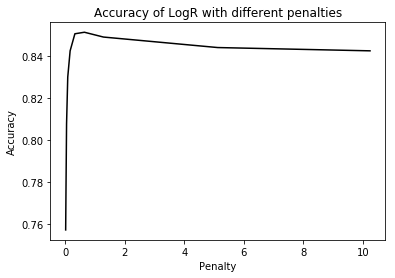

In [60]:
plt.plot(penalties, logr_penalty_accs, color='black')
plt.title('Accuracy of LogR with different penalties')
plt.xlabel('Penalty')
plt.ylabel('Accuracy')

peak_penalty_logr = penalties[np.argmax(logr_penalty_accs)]
print("Best penalty for this model: C = ", peak_penalty_logr)

Time elapsed: 2.982996
Best penalty for this model: C =  0.5760000000000001


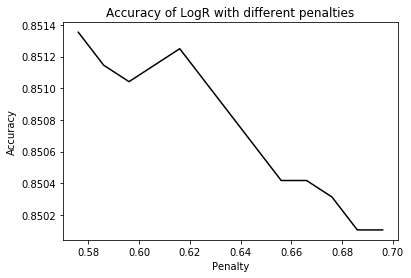

In [61]:
# Zoom in to see if we can find a specific penalty
penalties = np.arange(peak_penalty_logr * 0.9, peak_penalty_logr * 1.1, 0.01);
logr_penalty_accs = try_penalties(penalties, logr_func, 200, train_data, train_labels)

plt.plot(penalties, logr_penalty_accs, color='black')
plt.title('Accuracy of LogR with different penalties')
plt.xlabel('Penalty')
plt.ylabel('Accuracy')

peak_penalty_logr = penalties[np.argmax(logr_penalty_accs)]
print("Best penalty for this model: C = ", peak_penalty_logr)

The graph above changes every time you run it. The range of accuracy is very small as well. No point in going any further than the first penalty analysis.

# KNN Re-exploration

Apparently one of Kaggle's best models was KNN (88.52% Accuracy) so we should probably explore this again using a range of neighbors

In [1]:
knn_func = lambda n : KNeighborsClassifier(n_neighbors=n)

knn_scores = []
for i in range(1, 11):
    knn_scores.append(cross_val_class_accuracy(knn_func(i), train_data, train_labels, 0.2, 200, verbose=False))
print("Done testing different neighbors")

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), knn_scores, color='black')
plt.title("Accuracy of KNN with different # of neighbors")
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

best_knn_n = range(1, 11)[np.argmax(knn_scores)]
print("Most accurate number of neighbors:", best_knn_n)

NameError: name 'cross_val_class_accuracy' is not defined

Looking at their code, they only did one trial. Might explain why their results are so different from ours

# Explore which variables are most effective in the model

In [63]:
# make sure we are using the same cross val set
accs = []

train_df = df.iloc[trainX]
# exclude last column, which is what we are predicting
columns = df.columns[:-1]
for col in columns:
    # model excluding this columns
    reduced_df = train_df.drop(col, axis=1)
    clean_red_df = onehot_df(reduced_df)
    
    # model using only this column
    clean_solo_col = train_df[[col, 'target']]
    if col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
        clean_solo_col = onehot_df(clean_solo_col)
        
    X1 = clean_red_df.drop('target', axis=1).values
    y = clean_red_df['target'].values
    X2 = clean_solo_col.drop('target', axis=1).values
    # use highest performing model thus far
    model1 = LogR(C=peak_penalty_logr)
    model2 = LogR(C=peak_penalty_logr)
    print('Evaluating',col)
    acc_wo = cross_val_class_accuracy(model1, X1, y, 0.2, 2000, verbose=False)
    acc_alone = cross_val_class_accuracy(model2, X2, y, 0.2, 2000, verbose=False)
    print('Accuracy without:', acc_wo, ', alone:', acc_alone)
    print()
    accs.append([acc_wo, acc_alone])

Evaluating age
Accuracy without: 0.8550000000000002 , alone: 0.6181666666666663

Evaluating sex
Accuracy without: 0.8353333333333327 , alone: 0.609833333333333

Evaluating cp
Accuracy without: 0.8154583333333322 , alone: 0.7573749999999998

Evaluating trestbps
Accuracy without: 0.8459999999999998 , alone: 0.5669166666666665

Evaluating chol
Accuracy without: 0.8530416666666665 , alone: 0.5603749999999998

Evaluating fbs
Accuracy without: 0.8526249999999999 , alone: 0.5402499999999997

Evaluating restecg
Accuracy without: 0.8516249999999999 , alone: 0.6161250000000006

Evaluating thalach
Accuracy without: 0.8408333333333338 , alone: 0.7182916666666671

Evaluating exang
Accuracy without: 0.8533749999999997 , alone: 0.72025

Evaluating oldpeak
Accuracy without: 0.8414166666666675 , alone: 0.6845000000000001

Evaluating slope
Accuracy without: 0.8382916666666667 , alone: 0.7042916666666664

Evaluating ca
Accuracy without: 0.808125 , alone: 0.73825

Evaluating thal
Accuracy without: 0.83349

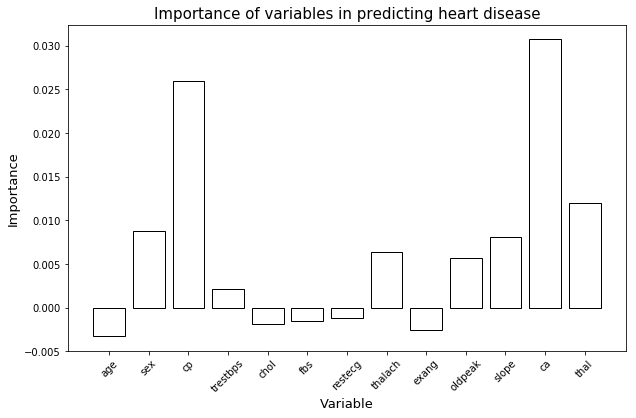

In [64]:
full_logr_acc = cross_val_class_accuracy(LogR(C=peak_penalty_logr), train_data, train_labels, 0.2, 2000, verbose=False)
accs = np.array(accs)
diff = full_logr_acc - accs[:,0]

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.bar(columns, diff*accs[:,1], facecolor='none', edgecolor='black')
ax.set_title('Importance of variables in predicting heart disease',fontsize=15)
ax.set_xlabel('Variable', fontsize=13)
ax.set_ylabel('Importance', fontsize=13)
ax.tick_params('x', rotation=45)

It seems that the `fbs`, `chol`, `restecg`, and `age` variables do not impact the accuracy of the model much, or even negatively impact it. 

Graph tends to change every time it is run. Overall, age, fbs, restecg, and chol generally have negative importance.

In [65]:
# make a reduced df excluding the "bad" columns
reduced_df = df.drop(['fbs', 'chol', 'restecg', 'age'], axis=1)

# Final testing of the top models

We have found the best hyperparameters and options for a SVM model, a LogR model and a LDA model. Now we will test them all on the withheld testing set and see which is actually best. We will also compare the reduced data set to the full set.

In [66]:
# two of each, the first for the full data set, the second for the reduced
final_models = [SVC(kernel='linear', C=peak_penalty_svm), SVC(kernel='linear', C=peak_penalty_svm),
                LDA(), LDA(), 
                LogR(C=peak_penalty_logr), LogR(C=peak_penalty_logr)]
reduced_X = reduced_df.drop('target', axis=1).values
reduced_test_data = reduced_X[testX,:]
reduced_train_data = reduced_X[trainX,:]

final_accs = []
predictions = []
for i in range(3):
    final_models[2*i].fit(train_data, train_labels)
    final_models[2*i+1].fit(reduced_train_data, train_labels)
    full_acc = final_models[2*i].score(test_data, test_labels)
    red_acc = final_models[2*i+1].score(reduced_test_data, test_labels)
    predictions.append(final_models[2*i+1].predict(reduced_test_data))
    final_accs.append(full_acc)
    final_accs.append(red_acc)

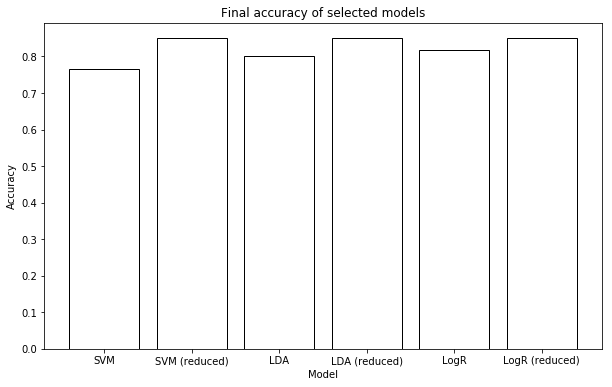

In [67]:
names = ['SVM', 'SVM (reduced)', 'LDA', 'LDA (reduced)', 'LogR', 'LogR (reduced)']
plt.figure(figsize=(10,6))
plt.bar(names, final_accs, facecolor='none', edgecolor='black')
plt.title('Final accuracy of selected models')
plt.xlabel('Model')
plt.ylabel('Accuracy');

In [68]:
print(final_accs)

[0.7666666666666667, 0.85, 0.8, 0.85, 0.8166666666666667, 0.85]


LDA and LogR with reduced data performed pretty well

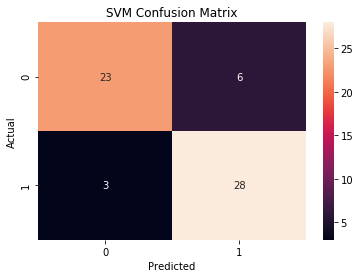

In [77]:
# Visualize predictions vs answers
from sklearn.metrics import confusion_matrix
import seaborn as sns

cms = []
for i, ax in enumerate(axes):
    cms.append(confusion_matrix(test_labels, predictions[i]))
    
sns.heatmap(cms[0], annot=True)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

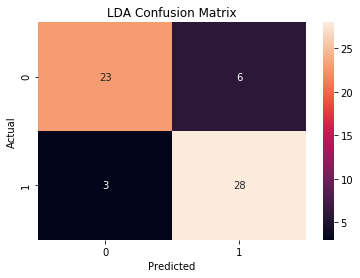

In [78]:
sns.heatmap(cms[1], annot=True)
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

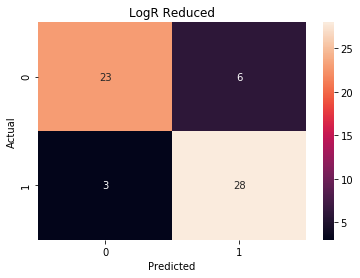

In [79]:
sns.heatmap(cms[2], annot=True)
plt.title('LogR Reduced')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

All three models have the same accuracy, so it makes sense for them to share similar confusion matrices